In [45]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [46]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
train[['Cabin_deck','Cabin_num','Cabin_side']] = train.Cabin.str.split('/',expand=True)
test[['Cabin_deck','Cabin_num','Cabin_side']] = test.Cabin.str.split('/',expand=True)
total = [train,test]

In [47]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_num,Cabin_side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S


In [48]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_num,Cabin_side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S


In [49]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [50]:
train.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Cabin_deck,Cabin_num,Cabin_side
count,8693,8492,8476,8494,8511,8490,8493,8494,8494,8494
unique,8693,3,2,6560,3,2,8473,8,1817,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall,F,82,S
freq,1,4602,5439,8,5915,8291,2,2794,28,4288


In [51]:
train[["VIP", "Transported"]].groupby(['VIP'], as_index=False).mean().sort_values(by='Transported')

,VIP,Transported
1,True,0.381910
0,False,0.506332


In [52]:
train[["Cabin_deck", "Transported"]].groupby(['Cabin_deck'], as_index=False).mean().sort_values(by='Transported')

,Cabin_deck,Transported
7,T,0.200000
4,E,0.357306
3,D,0.433054
5,F,0.439871
0,A,0.496094
6,G,0.516217
2,C,0.680054
1,B,0.734275


In [53]:
train[["Cabin_side", "Transported"]].groupby(['Cabin_side'], as_index=False).mean().sort_values(by='Transported')

,Cabin_side,Transported
0,P,0.451260
1,S,0.555037


In [54]:
train[["Destination", "Transported"]].groupby(['Destination'], as_index=False).mean().sort_values(by='Transported')

,Destination,Transported
2,TRAPPIST-1e,0.471175
1,PSO J318.5-22,0.503769
0,55 Cancri e,0.610000


In [55]:
train[["HomePlanet", "Transported"]].groupby(['HomePlanet'], as_index=False).mean().sort_values(by='Transported')

,HomePlanet,Transported
0,Earth,0.423946
2,Mars,0.523024
1,Europa,0.658846


In [56]:
train[["CryoSleep", "Transported"]].groupby(['CryoSleep'], as_index=False).mean().sort_values(by='Transported')

,CryoSleep,Transported
0,False,0.328921
1,True,0.817583


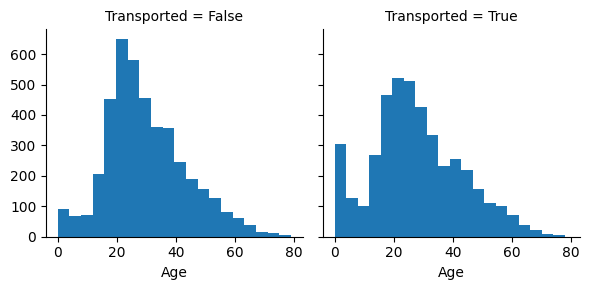

In [57]:
sns.FacetGrid(train, col='Transported').map(plt.hist, 'Age', bins=20)

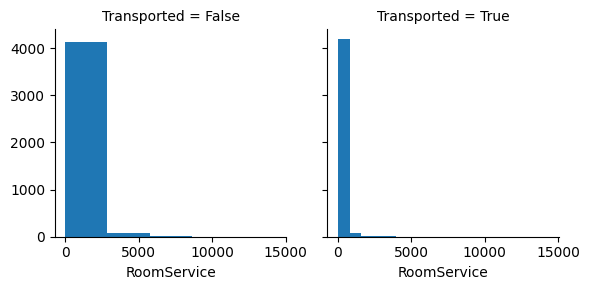

In [58]:
sns.FacetGrid(train, col='Transported').map(plt.hist, 'RoomService', bins=5)

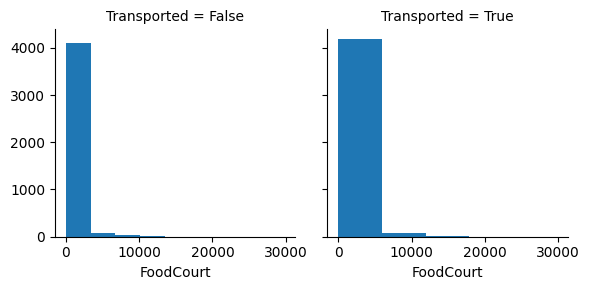

In [59]:
sns.FacetGrid(train, col='Transported').map(plt.hist, 'FoodCourt', bins=5)

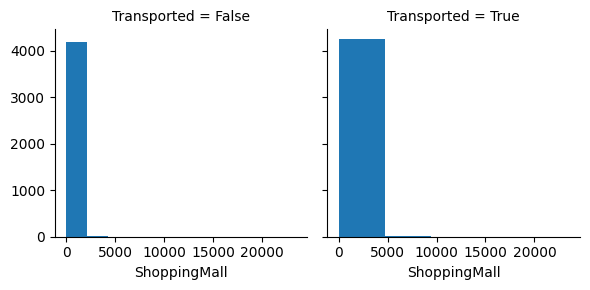

In [60]:
sns.FacetGrid(train, col='Transported').map(plt.hist, 'ShoppingMall', bins=5)

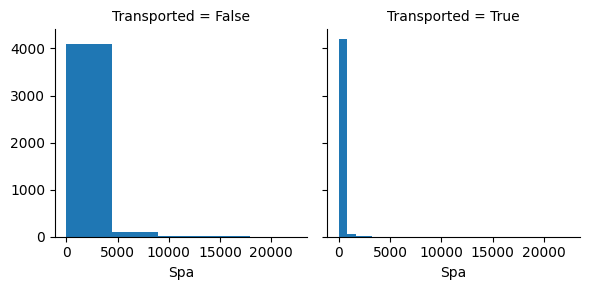

In [61]:
sns.FacetGrid(train, col='Transported').map(plt.hist, 'Spa', bins=5)

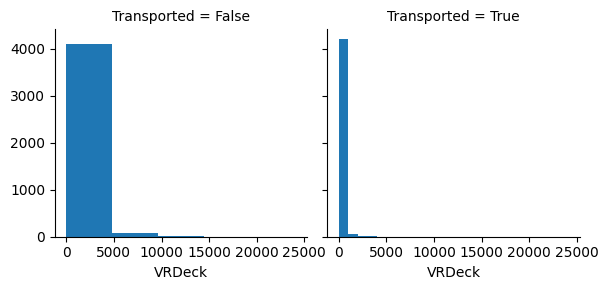

In [62]:
sns.FacetGrid(train, col='Transported').map(plt.hist, 'VRDeck', bins=5)

In [63]:
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Cabin_deck,Cabin_num,Cabin_side
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,G,1496,S
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,NaN,NaN
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,D,296,P
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,D,297,P


In [64]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_num,Cabin_side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S


In [65]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_num,Cabin_side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S


In [66]:
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Cabin_deck,Cabin_num,Cabin_side
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,G,1496,S
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,NaN,NaN
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,D,296,P
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,D,297,P


In [67]:
train = train.drop(['Name','Cabin'],axis=1)
test = test.drop(['Name','Cabin'],axis=1)

In [68]:
train['HomePlanet'] = train['HomePlanet'].map({'Europa':0,'Earth':1,'Mars':2})
test['HomePlanet'] = test['HomePlanet'].map({'Europa':0,'Earth':1,'Mars':2})

In [69]:
train['CryoSleep'] = train['CryoSleep'].replace({True: 1, False: 0})
train['VIP'] = train['VIP'].replace({True: 1, False: 0})
train['Transported'] = train['Transported'].replace({True: 1, False: 0})
test['CryoSleep'] = test['CryoSleep'].replace({True: 1, False: 0})
test['VIP'] = test['VIP'].replace({True: 1, False: 0})

In [70]:
train['Destination'] = train['Destination'].map({'TRAPPIST-1e':0, 'PSO J318.5-22':1, '55 Cancri e':2})
test['Destination'] = test['Destination'].map({'TRAPPIST-1e':0, 'PSO J318.5-22':1, '55 Cancri e':2})

In [97]:
train['Age'] = train['Age'].apply(lambda x: (x/train['Age'].max()))
test['Age'] = test['Age'].apply(lambda x: (x/test['Age'].max()))

In [73]:
train['Spa'] = train['Spa'].apply(lambda x: 1 if x > 0 else x)
train['RoomService'] = train['RoomService'].apply(lambda x: 1 if x > 0 else x)
train['FoodCourt'] = train['FoodCourt'].apply(lambda x: 1 if x > 0 else x)
train['ShoppingMall'] = train['ShoppingMall'].apply(lambda x: 1 if x > 0 else x)
train['VRDeck'] = train['VRDeck'].apply(lambda x: 1 if x > 0 else x)
test['Spa'] = test['Spa'].apply(lambda x: 1 if x > 0 else x)
test['RoomService'] = test['RoomService'].apply(lambda x: 1 if x > 0 else x)
test['FoodCourt'] = test['FoodCourt'].apply(lambda x: 1 if x > 0 else x)
test['ShoppingMall'] = test['ShoppingMall'].apply(lambda x: 1 if x > 0 else x)
test['VRDeck'] = test['VRDeck'].apply(lambda x: 1 if x > 0 else x)

In [74]:
train['Cabin_deck'] = train['Cabin_deck'].map({'A':0, 'B':1, 'C':2,'D':3,'E':4,'F':5,'G':6})
test['Cabin_deck'] = test['Cabin_deck'].map({'A':0, 'B':1, 'C':2,'D':3,'E':4,'F':5,'G':6})
train['Cabin_side'] = train['Cabin_side'].map({'P':0, 'S':1})
test['Cabin_side'] = test['Cabin_side'].map({'P':0, 'S':1})

In [75]:
train = train.drop(['Cabin_num'],axis = 1)
test = test.drop(['Cabin_num'],axis = 1)

In [88]:
train['HomePlanet'].fillna(train['HomePlanet'].dropna().median(), inplace=True)
test['HomePlanet'].fillna(test['HomePlanet'].dropna().median(), inplace=True)

In [93]:
test

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_deck,Cabin_num,Cabin_side
0,0013_01,1.0,1.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,3,1.0
1,0018_01,1.0,0.0,0.0,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,5.0,4,1.0
2,0019_01,0.0,1.0,2.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,1.0
3,0021_01,0.0,0.0,0.0,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,2.0,1,1.0
4,0023_01,1.0,0.0,0.0,20.0,0.0,10.0,0.0,635.0,0.0,0.0,5.0,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1.0,1.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1496,1.0
4273,9269_01,1.0,0.0,0.0,42.0,0.0,0.0,847.0,17.0,10.0,144.0,NaN,NaN,NaN
4274,9271_01,2.0,1.0,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,296,0.0
4275,9273_01,0.0,0.0,NaN,NaN,0.0,0.0,2680.0,0.0,0.0,523.0,3.0,297,0.0


In [83]:
X = train[['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'Cabin_deck', 'Cabin_side']]
y = train['Transported']

In [82]:
y

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64

In [84]:
X_train,X_traintest,y_train,y_traintest = train_test_split(X,y,test_size=0.1,shuffle=True)

In [85]:
X_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,Cabin_side
6440,0.0,1.0,2.0,0.506329,0.0,0.0,0.0,0.0,0.0,0.0,1,2.0,1.0
1195,1.0,0.0,0.0,0.291139,0.0,0.0,0.0,0.0,1.0,0.0,0,5.0,1.0
8284,1.0,0.0,0.0,0.291139,0.0,0.0,1.0,1.0,0.0,1.0,0,4.0,0.0
3431,1.0,0.0,0.0,0.291139,0.0,1.0,1.0,1.0,NaN,1.0,0,5.0,0.0
4557,1.0,0.0,0.0,0.379747,0.0,1.0,0.0,0.0,1.0,1.0,1,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6620,2.0,1.0,0.0,0.683544,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0,0.0
6102,1.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1,6.0,0.0
7024,2.0,1.0,0.0,0.430380,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0,1.0
4526,1.0,0.0,1.0,0.253165,0.0,1.0,1.0,0.0,1.0,1.0,0,NaN,NaN


In [86]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_traintest)

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
y = train["Transported"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
pred = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Transported': pred})
output.to_csv('submission.csv', index=False)